# Pip Installs

In [1]:
%%capture

!pip install librosa
!pip install tensorflow
!pip install numpy==1.23.5
!pip install pysoundfile
!pip install alive-progress
!pip install --upgrade pytube

Tensor flow does not work with Numpy 2.0 onward so make sure that 

# Imports

Below are the necessary imports 

In [2]:
#Imports
from pydub import AudioSegment as audio
import os
import numpy as np
import librosa
#Tensor Flow needs numpy at 1.23.5
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import re 
import soundfile as sf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from alive_progress import alive_bar
import yt_dlp

/Users/ryanbirmingham/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# File Creation

### Creating File Paths

In [3]:
unprocessed_data_dir = os.path.abspath('') + "/Unprocessed_Training_Wav_Files"
procesed_data_dir = os.path.abspath('') + "/Processed_Training_Wav_Files"

# YouTube Audio Download

In [25]:
def download_audio(url, starttime, endtime, output):
    # Convert start and end times to seconds
    hours, minutes, seconds = map(int, starttime.split(':'))
    start_time = hours * 3600 + minutes * 60 + seconds
    hours, minutes, seconds = map(int, endtime.split(':'))
    end_time = hours * 3600 + minutes * 60 + seconds
    
    """ 
    ydl_opts = {
        'format': 'bestaudio/best',  # Download the best audio format
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',  # Extract audio after download
            'preferredcodec': 'wav',  # Convert to wav format
        }],
        'noplaylist': True,  # Avoid downloading playlists, download a single video
        'quiet': False,  # Show output in the terminal
        'outtmpl': 'temp_audio.%(ext)s',  # Temporary output for the full audio
    }

    #Use yt-dlp to download the audio
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    """
    #Load the downloaded audio using pydub (assume the file was saved as temp_audio.wav)
    audio_file = audio.from_wav('temp_audio.wav')

    #Extract the desired clip (convert time to milliseconds)
    start_time_ms = start_time * 1000  # Convert start time from seconds to milliseconds
    end_time_ms = end_time * 1000      # Convert end time from seconds to milliseconds
    clip = audio_file[start_time_ms:end_time_ms]

    #Export the extracted clip as a new WAV file
    clip.export(output, format="wav")
    print(f"Audio clip saved to {output}")

    #Clean up the temporary file
    #os.remove('temp_audio.wav')

starttime = '2:53:46'
endtime = '2:55:41'
name = 'madeleineDean40799Clip1'
download_audio(url='https://www.youtube.com/watch?v=sjIOg4F_-Is',
               starttime=starttime,
               endtime=endtime,
               output=f'{unprocessed_data_dir}/{name}.wav')

[youtube] Extracting URL: https://www.youtube.com/watch?v=sjIOg4F_-Is
[youtube] sjIOg4F_-Is: Downloading webpage
[youtube] sjIOg4F_-Is: Downloading ios player API JSON
[youtube] sjIOg4F_-Is: Downloading mweb player API JSON
[youtube] sjIOg4F_-Is: Downloading player 03dbdfab


         player = https://www.youtube.com/s/player/03dbdfab/player_ias.vflset/en_US/base.js
         n = NocZHwzrnPI0l8yq1 ; player = https://www.youtube.com/s/player/03dbdfab/player_ias.vflset/en_US/base.js
         player = https://www.youtube.com/s/player/03dbdfab/player_ias.vflset/en_US/base.js
         n = zQvcxf5mrZUZLuQYa ; player = https://www.youtube.com/s/player/03dbdfab/player_ias.vflset/en_US/base.js


[youtube] sjIOg4F_-Is: Downloading m3u8 information
[info] sjIOg4F_-Is: Downloading 1 format(s): 251


KeyboardInterrupt: 

In [22]:
# Run before commit
os.remove('temp_audio.wav')

Steps
- go through all files in the unprocessed wav files
- break up all files so they are split by 1 second
- use regex to get the file name minus the .wav at the end to make new 1 second wav files
- save each of the files into the processed wav folder

Resample the unproccessed audio files for speaker recognition. This is needed for tensorflow and keras

In [ ]:
#This was a test for the fixing the audio with a single thing

"""
f_path = os.path.join(unproccessed_data_dir, "addisonWilson40173Clip1.wav")
arr, hz = librosa.load(f_path, sr = None)
new_f = librosa.resample(arr, orig_sr= hz, target_sr= 16000)
sf.write(os.path.join(unproccessed_data_dir,"new.wav"),new_f, 16000)
"""


'\nf_path = os.path.join(unproccessed_data_dir, "addisonWilson40173Clip1.wav")\narr, hz = librosa.load(f_path, sr = None)\nnew_f = librosa.resample(arr, orig_sr= hz, target_sr= 16000)\nsf.write(os.path.join(unproccessed_data_dir,"new.wav"),new_f, 16000)\n'

### Changes the Unporcessed_Wav_Files into 16000 hz

This is necessary for speaker recognition model training and feature extractions

In [23]:
for file in os.listdir(unprocessed_data_dir):
    if file != ".DS_Store":
        f_path = os.path.join(unprocessed_data_dir, file)
        arr, hz = librosa.load(f_path,sr = None)
        if hz != 16000:
            new_f = librosa.resample(arr, orig_sr = hz, target_sr = 16000)
            sf.write(f_path, new_f, 16000)

This is a test

In [25]:
f_path = os.path.join(unprocessed_data_dir, "addisonWilson40173Clip1.wav")
arr, hz = librosa.load(f_path, sr = None)
print(hz)

16000


## Remove the .DS_Store 
### This is a hiddent directory automatically created by Mac OS and causes errors

In [26]:
for folder in procesed_data_dir:
    path = os.path.join(folder, ".DS_Store")
    if folder == ".DS_Store":
        os.remove('.DS_Store')     

### Separates the files into 1 second intervals

In [70]:
for filename in os.listdir(unprocessed_data_dir):
    if filename.endswith(".wav"):
        hearing = audio.from_wav(os.path.join(unprocessed_data_dir,filename))
        speaker = filename.removesuffix(".wav")
        #name of congress person for processed_wav_files folder
        congress_name = speaker[:re.search(r"\d+",speaker).start()] 
        #start duration in milliseconds for audio recording start
        t1 = 0
        #end duration in milliseconds for audio recording start
        t2 = 1000
        #second of the clip
        second = 1
        total_time = hearing.duration_seconds*1000
        # Goes through all of the large audio files, splits them into 1 second audio files
        # and saves to the speaker name folder
        while t2 <= total_time:
            new_audio = hearing[t1:t2]
            #arr, hz = librosa.load(new_audio, sr = None)
            try:
                os.makedirs(f"{procesed_data_dir}/{congress_name}")
                new_audio.export(f"{procesed_data_dir}/{congress_name}/{speaker}_{second}.wav", format = "wav");
                #new_audio.export(f"{proccesed_data_dir}/{congress_name}/{speaker}_{second}.wav", format = "wav", parameters=["-ar", "16000"]);
            except:
                #new_audio.export(f"{proccesed_data_dir}/{congress_name}/{speaker}_{second}.wav", format = "wav", parameters=["-ar", "16000"]);
                new_audio.export(f"{procesed_data_dir}/{congress_name}/{speaker}_{second}.wav", format = "wav");
            t1 += 1000
            t2 += 1000
            second += 1

Check the Hz of a split file

In [28]:
a,b = librosa.load(os.path.abspath('')  + "/Processed_Training_Wav_Files/stephenCohen/stephenCohen40173Clip1_57.wav", sr = None)
print(b)

16000


## Feature Extraction

    The code below captures the spectral characteristics of the congress person speaking
    during the audio clip. This process mimics how people perceive and identify voices.
    The feature extraction below uses features which are derived from the Mel Scale and 
    cepstrum. These features are then used to train the model to identify patterns in 
    speaker voices. 

In [29]:
num_data = 0

for foldr in os.listdir(procesed_data_dir):
    if foldr != ".DS_Store":
        num_data += len(os.listdir(f"{procesed_data_dir}/{foldr}"))

In [30]:
def feature_extract (data_dir):
    features = []
    labels = []
    with alive_bar(num_data,force_tty=True, title='Collecting Features', bar = 'scuba') as bar: 
        for foldr in os.listdir(data_dir):
            if foldr != ".DS_Store":
                for file in os.listdir(f"{data_dir}/{foldr}"):
                    arr, hz = librosa.load(os.path.join(data_dir,foldr,file), sr = None, duration =  1)
                    mfccs = librosa.feature.mfcc(y = arr, sr = hz, n_mfcc = 13)
                    mfccs = StandardScaler().fit_transform(mfccs)
                    features.append(mfccs.T)
                    labels.append(foldr)
                    bar()
                 
                
    return np.array(features), np.array(labels)           
features, labels = feature_extract(procesed_data_dir)

### Count of unique Speakers

In [36]:
unique_labels = list(set(labels))
print(len(unique_labels))

68


### Feature Visualization

In [33]:
for feature_set, label in zip(features, labels[74:150]):
    print(f"Label: {label}, Features Shape: {feature_set.shape}")
    print(feature_set[0])  # Optionally print the actual features
    print("-" * 40)  # Separator for readability

Label: mikeThompson, Features Shape: (32, 13)
[-3.1454597   1.5753179  -0.10824023  0.23670268  0.17439432  0.16449605
  0.30459914 -0.12848634 -0.12092715  0.49552506  0.20922266  0.2881198
  0.05473582]
----------------------------------------
Label: mikeThompson, Features Shape: (32, 13)
[-3.1036396   1.693569    0.5150516   0.31102154  0.12665328  0.15970679
  0.12778515 -0.09254251 -0.08627746  0.06453532  0.01124668  0.24090326
  0.03198696]
----------------------------------------
Label: mikeThompson, Features Shape: (32, 13)
[-3.0893676   1.6258458   0.47112623  0.14024733  0.27482826  0.27267718
  0.08423237 -0.44742075 -0.10718     0.21682578  0.30623186  0.24767725
  0.00427622]
----------------------------------------
Label: mikeThompson, Features Shape: (32, 13)
[-3.3528137  -0.19482704  0.5605791   0.75114375  0.3998014   0.27799278
  0.20368043  0.5438508   0.14133175  0.44739565 -0.05309591  0.19697066
  0.07799034]
----------------------------------------
Label: mikeTh

### Training and splitting the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= .2, random_state= 42)

In [38]:
print(len(y_test))

4192


In [39]:
label_encoder = LabelEncoder()
label_enc = label_encoder.fit_transform(labels)

In [40]:
#Original shape shows n_samples, n_features, and n_channels
print(X_train.shape)
print(y_train.shape)

(16765, 32, 13)
(16765,)


### Reshape for SVM since it takes 2D arrays

In [41]:
X_train_SVM = X_train.reshape(X_train.shape[0], -1)
X_test_SVM = X_test.reshape(X_test.shape[0], -1)

In [42]:
print(X_train_SVM.shape)
print(y_train.shape)
#print(X_train_SVM)
print(y_train)

(16765, 416)
(16765,)
['jasonSmith' 'lloydSmucker' 'thomasKean' ... 'thomasKean' 'gregSteube'
 'michaelLawler']


### Trying the SVM approach

In [43]:
clm = SVC(kernel="linear", probability=True)

clm.fit(X_train_SVM,y_train)

y_predict = clm.predict(X_test_SVM)
incorrect = y_predict != y_test
print((len(y_test) - sum(incorrect))/len(y_test))

0.49713740458015265


#### Shows the probability for each label for each data set

In [44]:
prob = clm.predict_proba(X_test_SVM)
for i, arr in enumerate(prob):
    prob[i] = np.round(arr * 100,3)

#### Prints all of the probabilities for each test data point

In [45]:
#np.set_printoptions(suppress=True)
#for i in prob:
#    print(i)

#### Prints the True Value, the predicted Value, and the certainty for each test data point

In [46]:
max = 0
for i, val in enumerate(prob):
    max = np.max(val)
    print(f"The True value is {y_test[i]}\n"
          f"The Predicted value is {y_predict[i]} and is {max} certain\n")
    

The True value is michaelLawler
The Predicted value is victoriaSpartz and is 19.428 certain

The True value is dannyDavis
The Predicted value is dannyDavis and is 46.702 certain

The True value is lloydSmucker
The Predicted value is adrianSmith and is 12.567 certain

The True value is garretGraves
The Predicted value is richardLarsen and is 15.357 certain

The True value is drewFerguson
The Predicted value is bradWenstrup and is 17.413 certain

The True value is christopherSmith
The Predicted value is claudiaTenney and is 12.206 certain

The True value is addisonWilson
The Predicted value is addisonWilson and is 69.225 certain

The True value is stephenCohen
The Predicted value is adrianSmith and is 9.027 certain

The True value is gwenMoore
The Predicted value is troyCarter and is 23.349 certain

The True value is johnLarson
The Predicted value is stephenCohen and is 12.333 certain

The True value is maryPeltola
The Predicted value is maryPeltola and is 35.58 certain

The True value i

In [47]:
total = 0
predict = 0
real_dict = {}
pred_dict = {}

for i in labels:
    real_dict[i] = 0
    pred_dict[i] = 0

for pred, real in zip(y_predict,y_test):
    real_dict[real] += 1
    pred_dict[real] += 1 if real == pred else 0
for name in real_dict:
    print(
         f"{name} \n\taccuracy = {pred_dict[name]/real_dict[name]}" 
         f"\n\tpredict/real = {pred_dict[name]}/{real_dict[name]}"
         )

mikeThompson 
	accuracy = 0.6176470588235294
	predict/real = 42/68
michelleFischbach 
	accuracy = 0.3103448275862069
	predict/real = 9/29
johnLarson 
	accuracy = 0.2619047619047619
	predict/real = 11/42
gregSteube 
	accuracy = 0.6
	predict/real = 9/15
dannyDavis 
	accuracy = 0.6901408450704225
	predict/real = 49/71
garretGraves 
	accuracy = 0.7971014492753623
	predict/real = 55/69
eleanorNorton 
	accuracy = 0.6475409836065574
	predict/real = 79/122
claudiaTenney 
	accuracy = 0.4098360655737705
	predict/real = 25/61
peteStauber 
	accuracy = 0.5535714285714286
	predict/real = 31/56
danKildee 
	accuracy = 0.5116279069767442
	predict/real = 22/43
earlBlumenauer 
	accuracy = 0.4418604651162791
	predict/real = 19/43
blakeMoore 
	accuracy = 0.4823529411764706
	predict/real = 41/85
ronEstes 
	accuracy = 0.5428571428571428
	predict/real = 19/35
brandonWilliams 
	accuracy = 0.48717948717948717
	predict/real = 19/39
gregStanton 
	accuracy = 0.2711864406779661
	predict/real = 16/59
dinaTitus 
	acc

Test Evaluation Accuracy: 0.49713740458015265


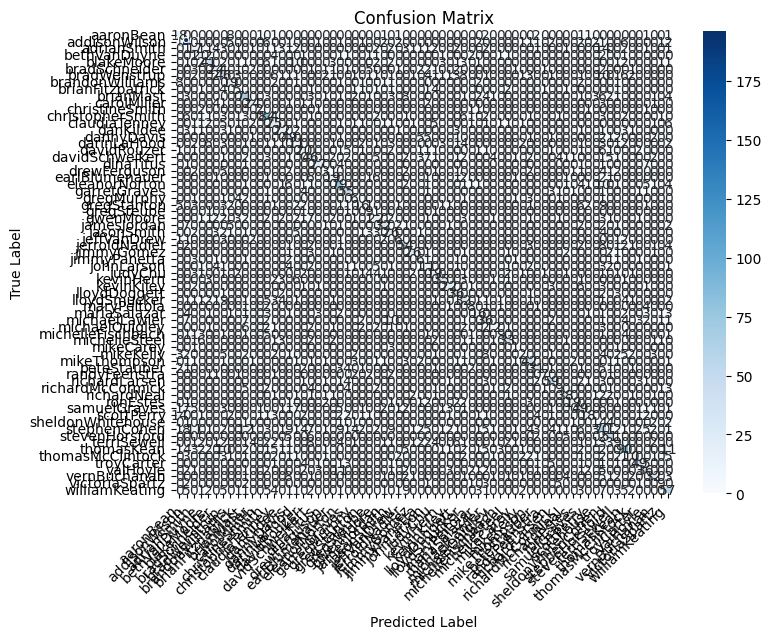

In [48]:
# Decode the labels back to original format
#y_test_decoded = label_encoder.inverse_transform(y_test)
#y_pred_decoded = label_encoder.inverse_transform(y_predict)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict, labels=np.unique(labels))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Test Evaluation Accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Try RNN LSTM approach

### Training and testing

In [49]:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(features, label_enc, test_size=0.2, random_state=42)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(label_enc)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32)

/Users/ryanbirmingham/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.1154 - loss: 3.6825
Epoch 2/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.3459 - loss: 2.3912
Epoch 3/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.4769 - loss: 1.8580
Epoch 4/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.5497 - loss: 1.5427
Epoch 5/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.6070 - loss: 1.3297
Epoch 6/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.6491 - loss: 1.1603
Epoch 7/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.6649 - loss: 1.0954
Epoch 8/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.7002 - loss: 0.9988
Epoch 9/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.7250 - loss: 0.8937
Epoch 10/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.7451 - loss: 0.8253
Epoch 11/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.7604 - loss: 0.7747
Epoch 12/20
524/524 ━━━━━━━━━━

131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Test Evaluation Accuracy: 0.735925572519084


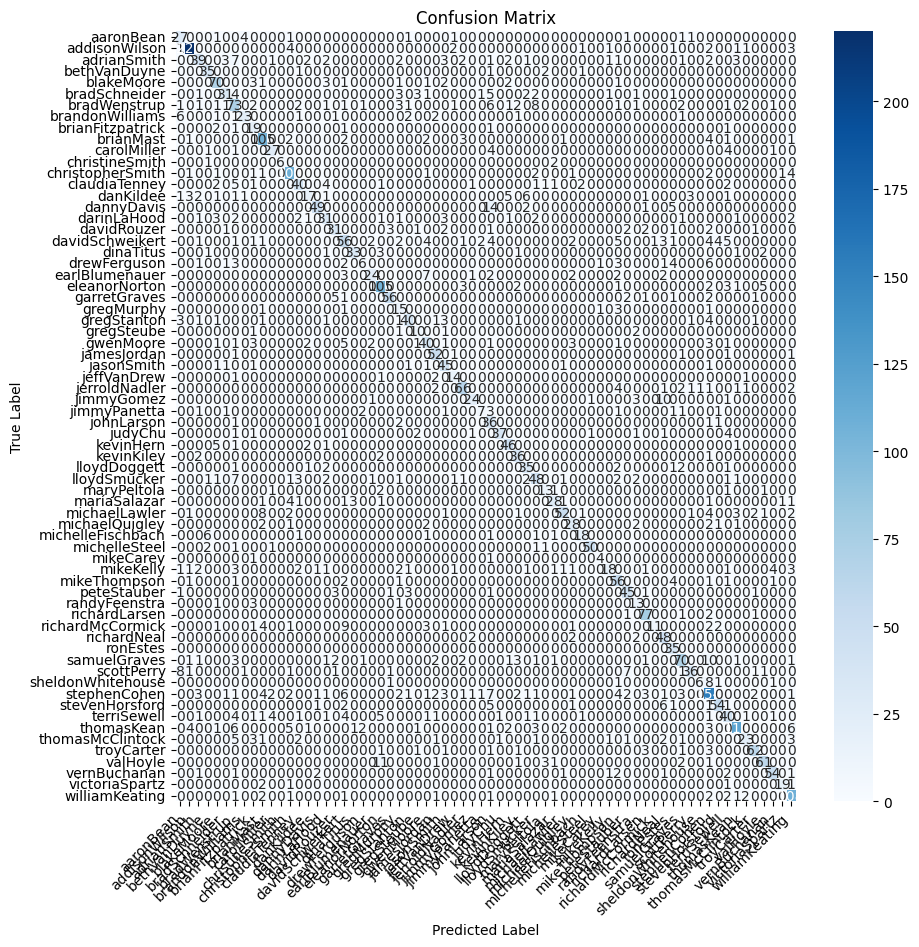

In [51]:
y_pred_probabilities = model.predict(X_test_rnn)

y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode the labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test_rnn)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=np.unique(labels))

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Try GRU RNN approach

In [52]:
num_speakers = len(next(os.walk(procesed_data_dir))[1])

np.random.seed(42)
tf.random.set_seed(42)

y_train_one_hot = to_categorical(y_train_rnn, num_classes=num_speakers)  # n = number of speakers
y_test_one_hot = to_categorical(y_test_rnn, num_classes=num_speakers)

gru = Sequential()
gru.add(GRU(128, return_sequences = False, input_shape = (32,13))) 
gru.add(BatchNormalization())
gru.add(Dropout(.5))
gru.add(Dense(num_speakers, activation = 'softmax'))
# Compile the model
gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
gru.summary()

/Users/ryanbirmingham/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        54,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 68)             │         8,772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,196 (250.77 KB)

 Trainable params: 63,940 (249.77 KB)

 Non-trainable params: 256 (1.00 KB)

In [53]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = gru.fit(X_train_rnn, y_train_one_hot,
                  epochs=20,
                  batch_size=32,
                  validation_data=(X_test_rnn, y_test_one_hot),
                  callbacks=[early_stopping])

Epoch 1/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.1386 - loss: 3.8140 - val_accuracy: 0.1097 - val_loss: 3.6395
Epoch 2/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.3957 - loss: 2.2856 - val_accuracy: 0.2402 - val_loss: 3.1582
Epoch 3/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.4515 - loss: 2.0086 - val_accuracy: 0.2875 - val_loss: 3.1069
Epoch 4/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.4955 - loss: 1.8249 - val_accuracy: 0.3693 - val_loss: 2.6918
Epoch 5/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.5345 - loss: 1.6571 - val_accuracy: 0.5036 - val_loss: 1.8016
Epoch 6/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5699 - loss: 1.5199 - val_accuracy: 0.5496 - val_loss: 1.6194
Epoch 7/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5985 - loss: 1.4236 - val_accuracy: 0.5100 - val_loss: 1.9014
Epoch 8/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6221 - loss: 1.3302 - 

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
4192
Test Evaluation Accuracy: 0.7645515267175572


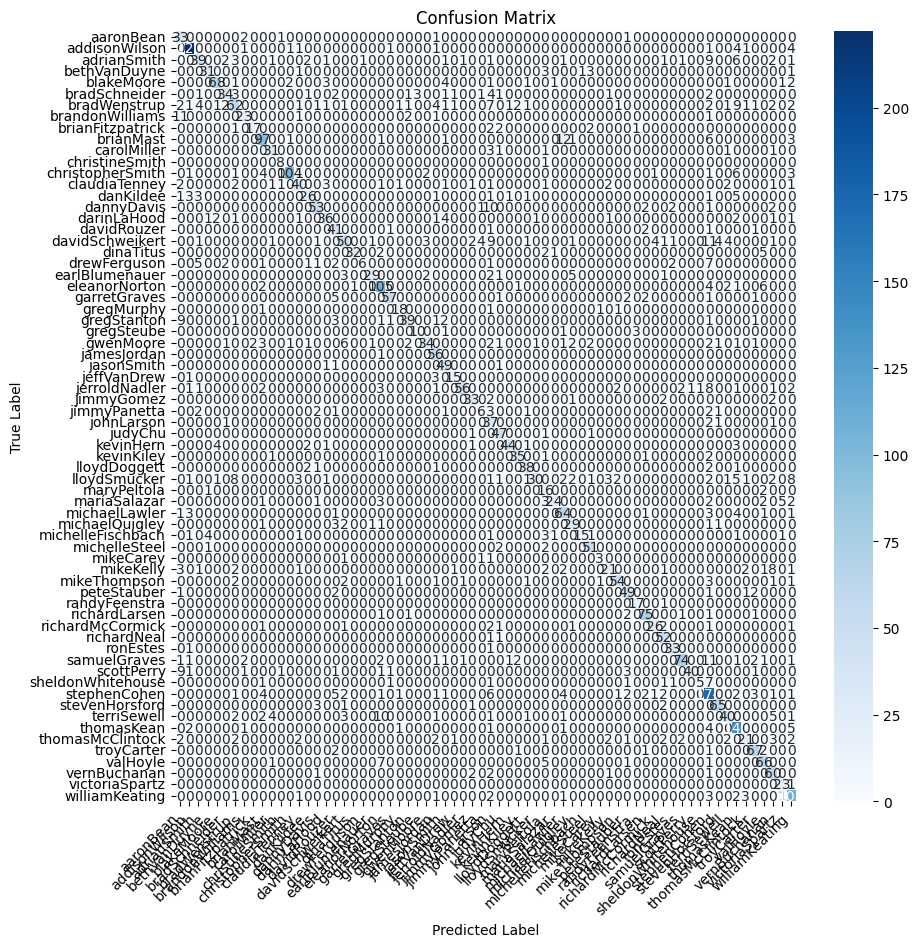

In [54]:
y_pred_probabilities = gru.predict(X_test_rnn)

y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode the labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test_rnn)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print(len(y_pred_decoded))
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=np.unique(labels))

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()